In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import time 
from scipy.stats import norm 

In [3]:
def histograma_(df, var, color, title, x_axis, y_axis, size):
    plt.figure(figsize=size)
    sns.histplot(data=df[var],kde=True,color=color,bins=50)
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

def VaR_inversion(VaR,inversion):
    print("La maxima perdida posible invirtiendo 1,000,000 es:",VaR*inversion)

# 1.- Lectura y descripcion de los datos historicos

In [4]:
acciones = ['AAPL',"UBS","JPM","GOOG"]
start = '2007-04-21'
end = time.strftime("%Y-%m-%d", time.localtime())
df_precios = yf.download(acciones, start = start, end = end)['Close'].reset_index()
df_percios = df_precios.rename({"Date": "Fechas"}, axis=1)
df_percios

[*********************100%***********************]  4 of 4 completed


,Fechas,AAPL,GOOG,JPM,UBS
0,2007-04-23,3.339643,11.932275,52.279999,64.000000
1,2007-04-24,3.330000,11.893670,52.160000,64.540001
2,2007-04-25,3.405357,11.905127,52.820000,65.559998
3,2007-04-26,3.530000,11.984579,52.939999,66.150002
4,2007-04-27,3.568571,11.930531,52.549999,65.360001
...,...,...,...,...,...
4042,2023-05-11,173.750000,116.900002,136.050003,19.190001
4043,2023-05-12,172.570007,117.919998,134.100006,19.160000
4044,2023-05-15,172.070007,116.959999,135.229996,19.379999
4045,2023-05-16,172.070007,120.089996,134.320007,19.100000


In [5]:
df_percios["Log_rend_AAPL"] =np.log( (df_percios["AAPL"]/df_percios["AAPL"].shift(1)))
df_percios["Log_rend_GOOG"] =np.log( (df_percios["GOOG"]/df_percios["GOOG"].shift(1)))
df_percios["Log_rend_JPM"] =np.log( (df_percios["JPM"]/df_percios["JPM"].shift(1)))
df_percios["Log_rend_UBS"] =np.log( (df_percios["UBS"]/df_percios["UBS"].shift(1)))
df_percios

,Fechas,AAPL,GOOG,JPM,UBS,Log_rend_AAPL,Log_rend_GOOG,Log_rend_JPM,Log_rend_UBS
0,2007-04-23,3.339643,11.932275,52.279999,64.000000,NaN,NaN,NaN,NaN
1,2007-04-24,3.330000,11.893670,52.160000,64.540001,-0.002892,-0.003241,-0.002298,0.008402
2,2007-04-25,3.405357,11.905127,52.820000,65.559998,0.022377,0.000963,0.012574,0.015681
3,2007-04-26,3.530000,11.984579,52.939999,66.150002,0.035948,0.006652,0.002269,0.008959
4,2007-04-27,3.568571,11.930531,52.549999,65.360001,0.010867,-0.004520,-0.007394,-0.012014
...,...,...,...,...,...,...,...,...,...
4042,2023-05-11,173.750000,116.900002,136.050003,19.190001,0.001094,0.040323,-0.003156,-0.010368
4043,2023-05-12,172.570007,117.919998,134.100006,19.160000,-0.006814,0.008688,-0.014437,-0.001565
4044,2023-05-15,172.070007,116.959999,135.229996,19.379999,-0.002902,-0.008174,0.008391,0.011417
4045,2023-05-16,172.070007,120.089996,134.320007,19.100000,0.000000,0.026409,-0.006752,-0.014553


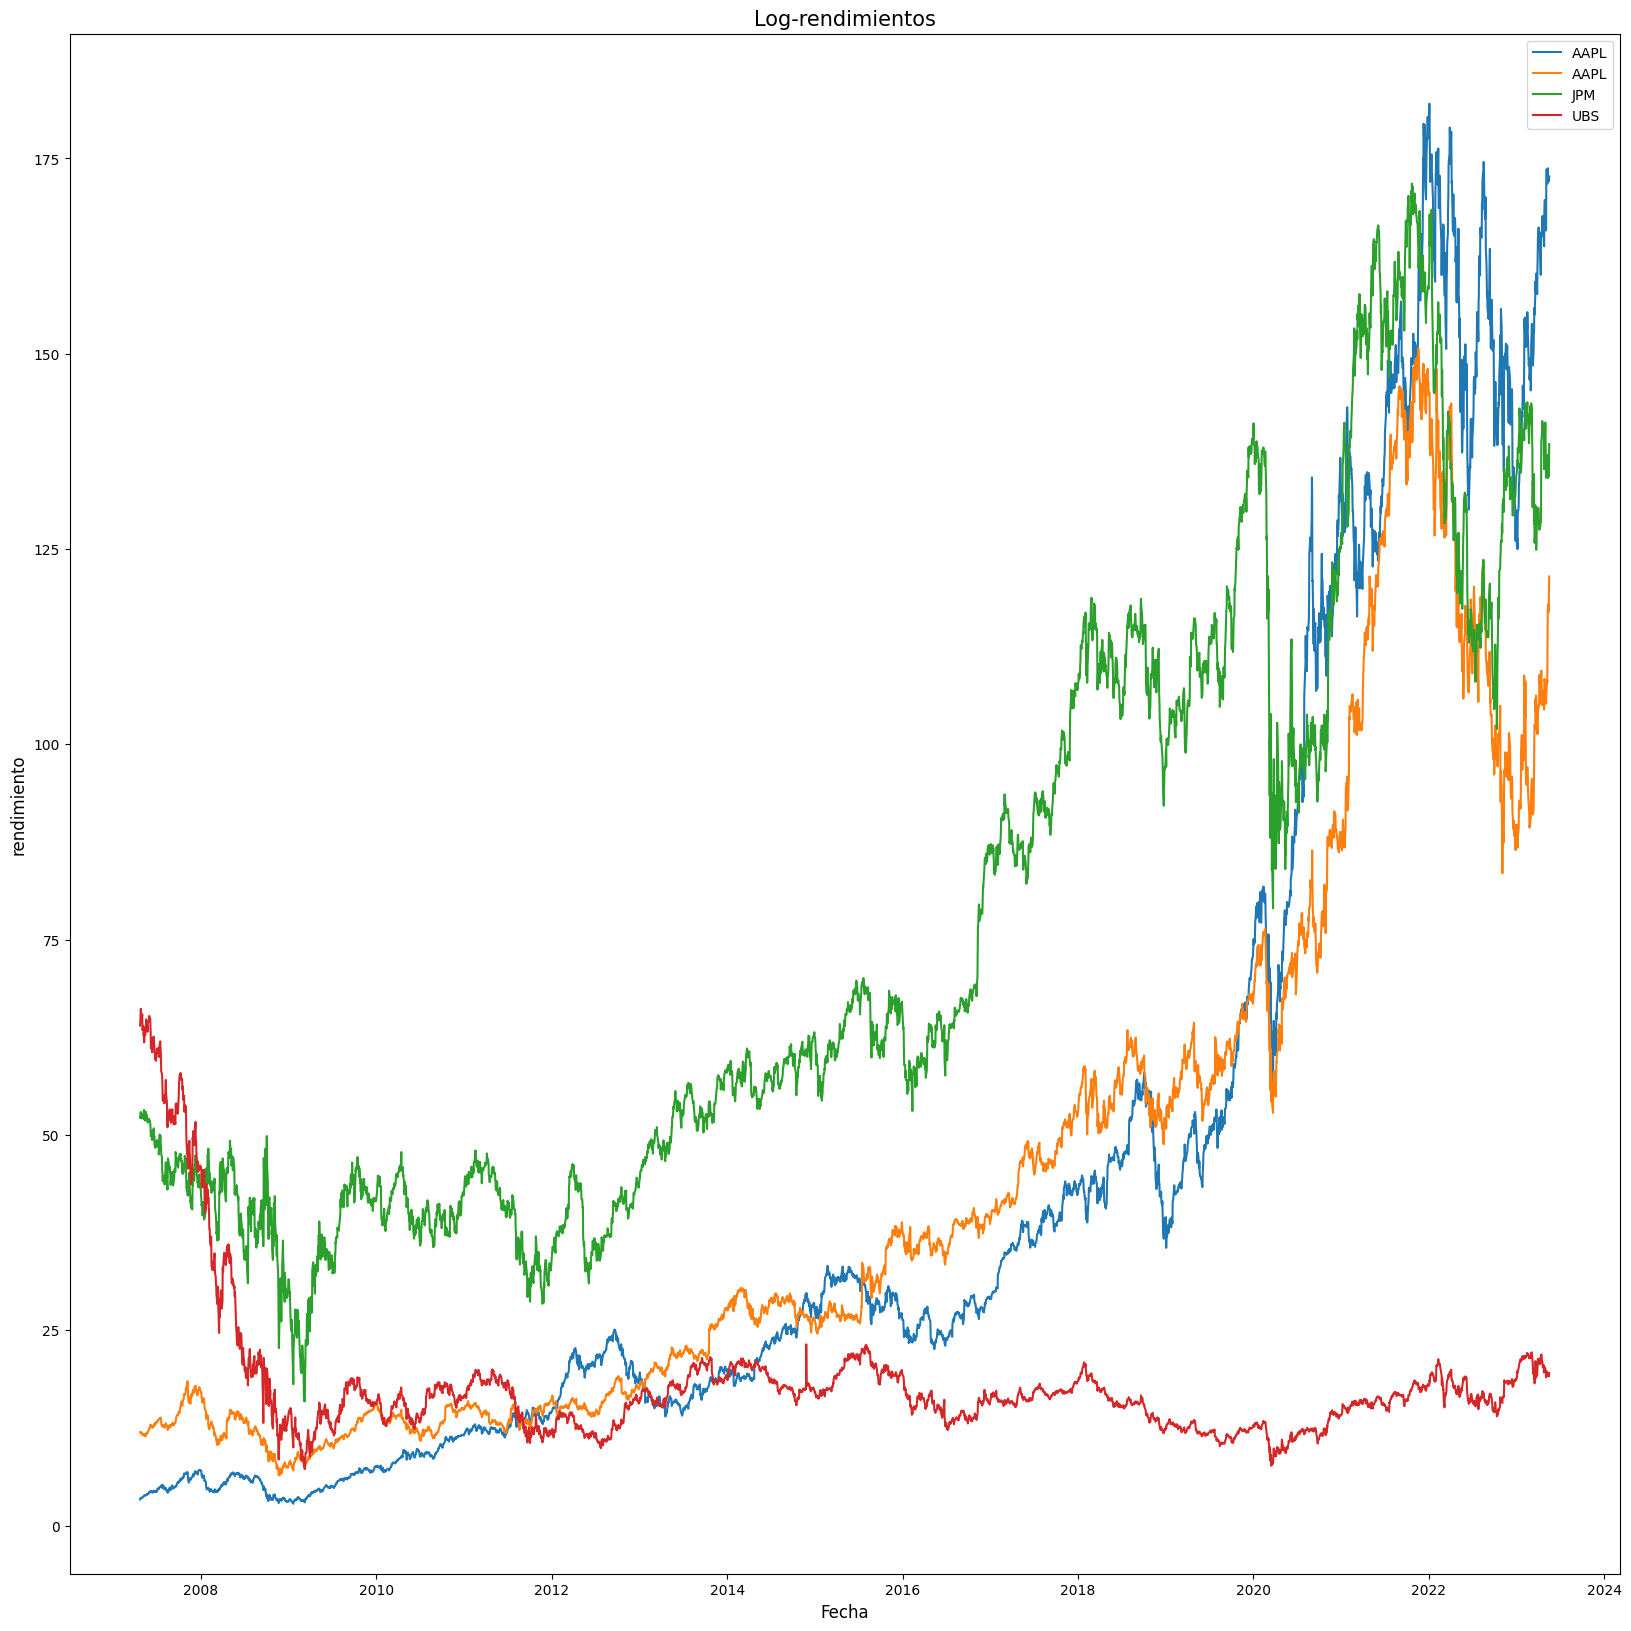

In [6]:
plt.figure(figsize=(20,20))
plt.plot(df_percios["Fechas"],df_percios["AAPL"],label="AAPL")
plt.plot(df_percios["Fechas"],df_percios["GOOG"],label="AAPL")
plt.plot(df_percios["Fechas"],df_percios["JPM"],label="JPM")
plt.plot(df_percios["Fechas"],df_percios["UBS"],label="UBS")
plt.title('Log-rendimientos',fontsize=15)
plt.xlabel('Fecha',fontsize=12)
plt.ylabel('rendimiento',fontsize=12)
plt.legend()
plt.show()

In [7]:
media_AAPL = df_percios["Log_rend_AAPL"].mean()
desviacion_AAPL = df_percios["Log_rend_AAPL"].std()

media_GOOG = df_percios["Log_rend_GOOG"].mean()
desviacion_GOOG = df_percios["Log_rend_GOOG"].std()

media_JPM = df_percios["Log_rend_JPM"].mean()
desviacion_JPM = df_percios["Log_rend_JPM"].std()

media_UBS = df_percios["Log_rend_UBS"].mean()
desviacion_UBS = df_percios["Log_rend_UBS"].std()

print(f"media_AAPL: {media_AAPL}\ndesviacion_AAPL: {desviacion_AAPL}")
print(" ")
print(f"media_GOOG: {media_GOOG}\ndesviacion_GOOG: {desviacion_GOOG}")
print(" ")
print(f"media_JPM: {media_JPM}\ndesviacion_JPM: {desviacion_JPM}")
print(" ")
print(f"media_UBS: {media_UBS}\ndesviacion_UBS: {desviacion_UBS}")
print(" ")



media_AAPL: 0.0009751938156746735
desviacion_AAPL: 0.020313694761688213
 
media_GOOG: 0.0005735300962367583
desviacion_GOOG: 0.018785429138943953
 
media_JPM: 0.00024070572470785473
desviacion_JPM: 0.02477479764893746
 
media_UBS: -0.00029323267174765895
desviacion_UBS: 0.02770640881319954
 


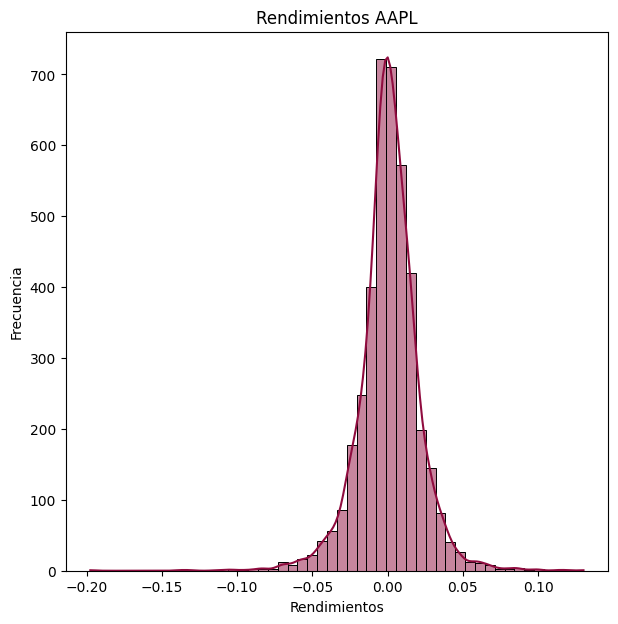

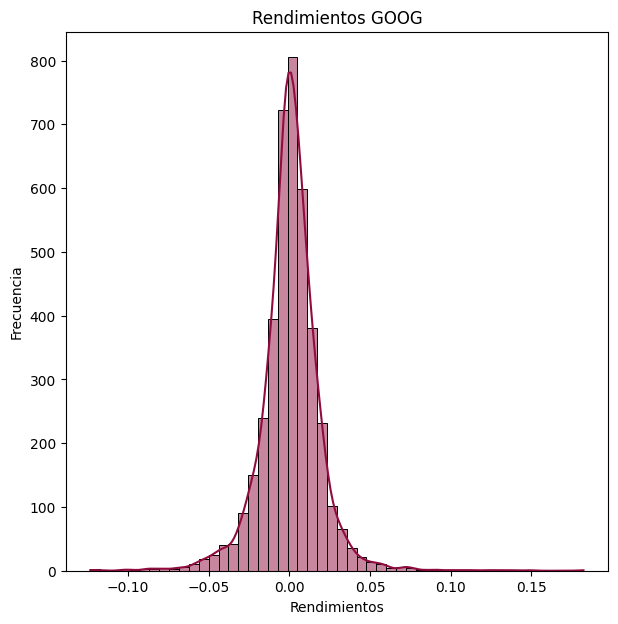

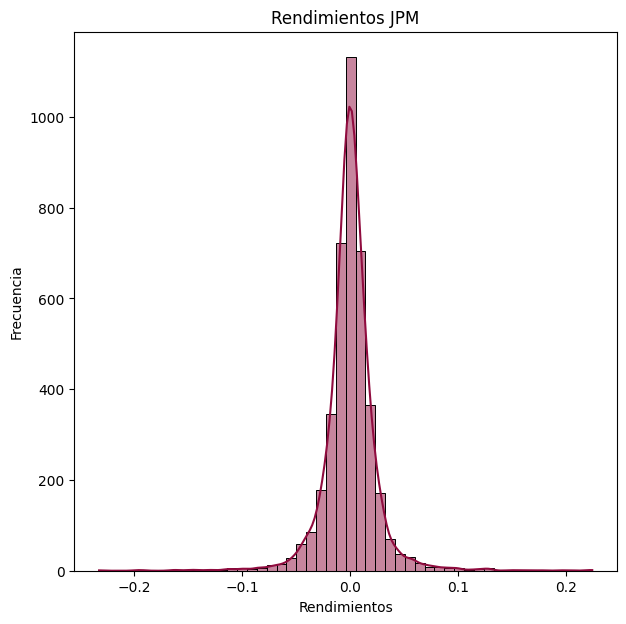

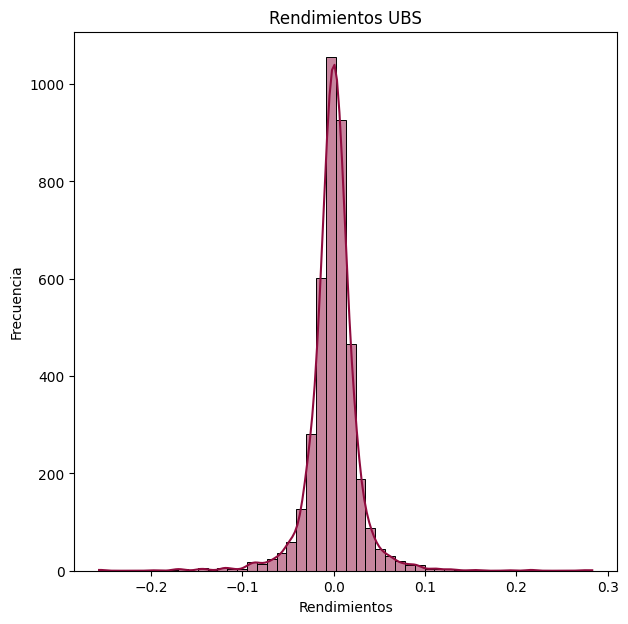

In [8]:

histograma_(df_percios,
            var="Log_rend_AAPL",
            color="#900C3F",
            title="Rendimientos AAPL",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

histograma_(df_percios,
            var="Log_rend_GOOG",
            color="#900C3F",
            title="Rendimientos GOOG",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

histograma_(df_percios,
            var="Log_rend_JPM",
            color="#900C3F",
            title="Rendimientos JPM",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

histograma_(df_percios,
            var="Log_rend_UBS",
            color="#900C3F",
            title="Rendimientos UBS",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

## Precio historico del portafolio


In [9]:
df_portafolio =  pd.DataFrame()
acc_AAPL = 50
acc_GOOG = 50
acc_JPM = 10
acc_UBS = 10
df_portafolio["Fechas"] = df_percios["Fechas"]
df_portafolio["AAPL"] = acc_AAPL*df_percios["AAPL"]
df_portafolio["GOOG"] = acc_GOOG*df_percios["GOOG"]
df_portafolio["JPM"] = acc_JPM*df_percios["JPM"]
df_portafolio["UBS"] = acc_UBS*df_percios["UBS"]
df_portafolio

,Fechas,AAPL,GOOG,JPM,UBS
0,2007-04-23,166.982150,596.613741,522.799988,640.000000
1,2007-04-24,166.499996,594.683504,521.599998,645.400009
2,2007-04-25,170.267844,595.256329,528.199997,655.599976
3,2007-04-26,176.499999,599.228954,529.399986,661.500015
4,2007-04-27,178.428555,596.526527,525.499992,653.600006
...,...,...,...,...,...
4042,2023-05-11,8687.500000,5845.000076,1360.500031,191.900005
4043,2023-05-12,8628.500366,5895.999908,1341.000061,191.599998
4044,2023-05-15,8603.500366,5847.999954,1352.299957,193.799992
4045,2023-05-16,8603.500366,6004.499817,1343.200073,191.000004


In [10]:
df_portafolio["Total"] = df_portafolio["AAPL"] + df_portafolio["GOOG"] + df_portafolio["JPM"]+ df_portafolio["UBS"]
df_portafolio

,Fechas,AAPL,GOOG,JPM,UBS,Total
0,2007-04-23,166.982150,596.613741,522.799988,640.000000,1926.395879
1,2007-04-24,166.499996,594.683504,521.599998,645.400009,1928.183508
2,2007-04-25,170.267844,595.256329,528.199997,655.599976,1949.324145
3,2007-04-26,176.499999,599.228954,529.399986,661.500015,1966.628954
4,2007-04-27,178.428555,596.526527,525.499992,653.600006,1954.055080
...,...,...,...,...,...,...
4042,2023-05-11,8687.500000,5845.000076,1360.500031,191.900005,16084.900112
4043,2023-05-12,8628.500366,5895.999908,1341.000061,191.599998,16057.100334
4044,2023-05-15,8603.500366,5847.999954,1352.299957,193.799992,15997.600269
4045,2023-05-16,8603.500366,6004.499817,1343.200073,191.000004,16142.200260


In [11]:
df_portafolio["Log_rend_portafolio"] =np.log( (df_portafolio["Total"]/df_portafolio["Total"].shift(1)))
df_portafolio

,Fechas,AAPL,GOOG,JPM,UBS,Total,Log_rend_portafolio
0,2007-04-23,166.982150,596.613741,522.799988,640.000000,1926.395879,NaN
1,2007-04-24,166.499996,594.683504,521.599998,645.400009,1928.183508,0.000928
2,2007-04-25,170.267844,595.256329,528.199997,655.599976,1949.324145,0.010904
3,2007-04-26,176.499999,599.228954,529.399986,661.500015,1966.628954,0.008838
4,2007-04-27,178.428555,596.526527,525.499992,653.600006,1954.055080,-0.006414
...,...,...,...,...,...,...,...
4042,2023-05-11,8687.500000,5845.000076,1360.500031,191.900005,16084.900112,0.014667
4043,2023-05-12,8628.500366,5895.999908,1341.000061,191.599998,16057.100334,-0.001730
4044,2023-05-15,8603.500366,5847.999954,1352.299957,193.799992,15997.600269,-0.003712
4045,2023-05-16,8603.500366,6004.499817,1343.200073,191.000004,16142.200260,0.008998


In [12]:

media_portafolio = df_portafolio["Log_rend_portafolio"].mean()
desviacion_portafolio = df_portafolio["Log_rend_portafolio"].std()

print(f"media_portafolio: {media_portafolio}\ndesviacion_portafolio: {desviacion_portafolio}")
print(" ")

media_portafolio: 0.0005276328170321907
desviacion_portafolio: 0.017779962393399656
 


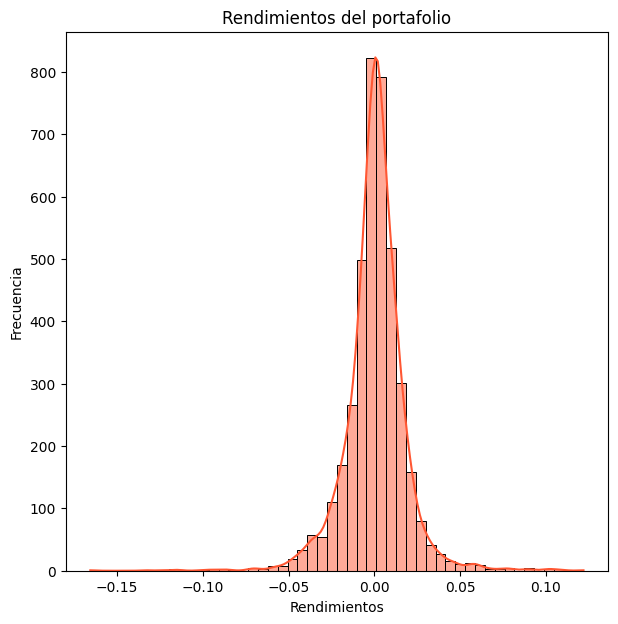

In [13]:

histograma_(df_portafolio,
            var="Log_rend_portafolio",
            color="#FF5733",
            title="Rendimientos del portafolio",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

In [14]:
df_portafolio.dropna(inplace=True)
df_portafolio.reset_index(drop=True,inplace=True)

# VaR y cVar Montecarlo

### VaR y cVaR AAPL

In [15]:
inversion = 1000000
df_simulaciones = pd.DataFrame()
df_simulaciones["Sim_Z"] = np.random.standard_normal(size=1000000)
s0 = df_percios.iloc[-1,1]
df_simulaciones['Sim_S1'] = df_simulaciones['Sim_Z'].map(lambda x : s0*np.exp((media_AAPL-(desviacion_AAPL**2)/2)+desviacion_AAPL*x))
df_simulaciones

,Sim_Z,Sim_S1
0,0.596083,174.928200
1,0.954524,176.206549
2,-0.153764,172.283857
3,-2.462299,164.391137
4,-0.878842,169.764882
...,...,...
999995,-1.289171,168.355721
999996,-1.106919,168.980167
999997,-0.225857,172.031737
999998,1.046685,176.536739


In [16]:
df_simulaciones['Rendimientos'] = df_simulaciones['Sim_S1'].map(lambda x : np.log(x/s0))
df_simulaciones


,Sim_Z,Sim_S1,Rendimientos
0,0.596083,174.928200,0.012878
1,0.954524,176.206549,0.020159
2,-0.153764,172.283857,-0.002355
3,-2.462299,164.391137,-0.049250
4,-0.878842,169.764882,-0.017084
...,...,...,...
999995,-1.289171,168.355721,-0.025419
999996,-1.106919,168.980167,-0.021717
999997,-0.225857,172.031737,-0.003819
999998,1.046685,176.536739,0.022031


In [17]:
VaR_95_montecarlo_AAPL = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_AAPL

-0.032611082392368713

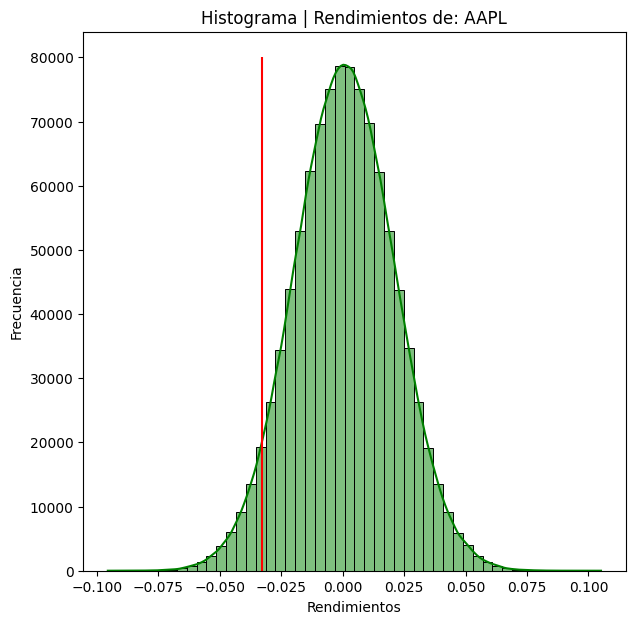

In [18]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_AAPL,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma | Rendimientos de: AAPL")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

In [19]:
VaR_inversion(VaR_95_montecarlo_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -32611.082392368713


### cVaR


In [20]:
df_cvar = df_simulaciones[df_simulaciones['Rendimientos'] < VaR_95_montecarlo_AAPL].reset_index(drop=True)
cvar_95_montecarlo_AAPL = np.mean(df_cvar['Rendimientos'])
cvar_95_montecarlo_AAPL


-0.041116771555168304

In [21]:
VaR_inversion(cvar_95_montecarlo_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -41116.77155516831


## VaR y CVaR GOOG

In [22]:
inversion = 1000000
df_simulaciones = pd.DataFrame()
df_simulaciones["Sim_Z"] = np.random.standard_normal(size=1000000)
s0 = df_percios.iloc[-1,2]
df_simulaciones['Sim_S1'] = df_simulaciones['Sim_Z'].map(lambda x : s0*np.exp((media_GOOG-(desviacion_GOOG**2)/2)+desviacion_GOOG*x))
df_simulaciones

,Sim_Z,Sim_S1
0,-0.093027,121.316060
1,1.022793,123.885822
2,1.437948,124.855769
3,0.811036,123.393989
4,1.044757,123.936950
...,...,...
999995,0.228156,122.050239
999996,-0.757267,119.811679
999997,0.214871,122.019785
999998,1.504860,125.012809


In [23]:
df_simulaciones['Rendimientos'] = df_simulaciones['Sim_S1'].map(lambda x : np.log(x/s0))
df_simulaciones


,Sim_Z,Sim_S1,Rendimientos
0,-0.093027,121.316060,-0.001350
1,1.022793,123.885822,0.019611
2,1.437948,124.855769,0.027410
3,0.811036,123.393989,0.015633
4,1.044757,123.936950,0.020023
...,...,...,...
999995,0.228156,122.050239,0.004683
999996,-0.757267,119.811679,-0.013829
999997,0.214871,122.019785,0.004434
999998,1.504860,125.012809,0.028667


In [24]:
VaR_95_montecarlo_GOOG = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_GOOG

-0.030496175104611258

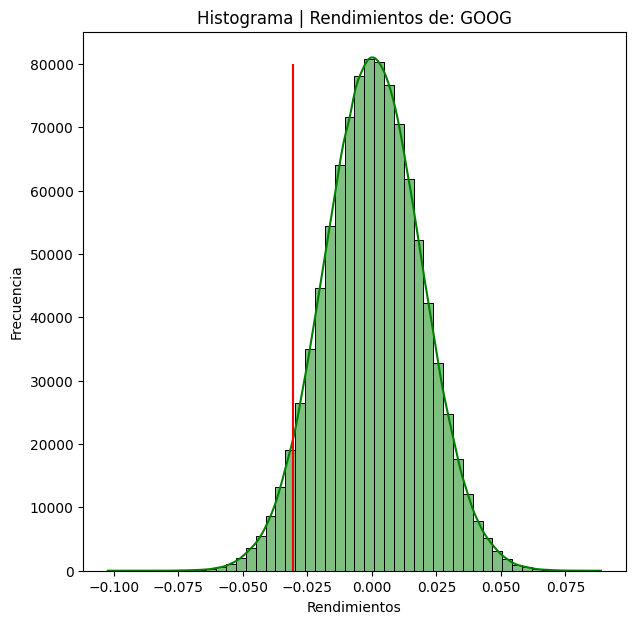

In [25]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_GOOG,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma | Rendimientos de: GOOG")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

In [26]:
VaR_inversion(VaR_95_montecarlo_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -30496.17510461126


### cVaR

In [27]:
df_cvar = df_simulaciones[df_simulaciones['Rendimientos'] < VaR_95_montecarlo_GOOG].reset_index(drop=True)
cvar_95_montecarlo_GOOG = np.mean(df_cvar['Rendimientos'])
cvar_95_montecarlo_GOOG

-0.03831081005223701

In [28]:
VaR_inversion(cvar_95_montecarlo_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -38310.81005223701


# VaR y cVaR JPM

In [29]:
inversion = 1000000
df_simulaciones = pd.DataFrame()
df_simulaciones["Sim_Z"] = np.random.standard_normal(size=1000000)
s0 = df_percios.iloc[-1,3]
df_simulaciones['Sim_S1'] = df_simulaciones['Sim_Z'].map(lambda x : s0*np.exp((media_JPM-(desviacion_JPM**2)/2)+desviacion_JPM*x))
df_simulaciones

,Sim_Z,Sim_S1
0,-0.737914,135.932899
1,0.303337,139.485151
2,1.524721,143.770417
3,-1.803439,132.391469
4,0.539302,140.302967
...,...,...
999995,-0.603641,136.385845
999996,0.595790,140.499457
999997,0.991604,141.884001
999998,1.898722,145.108753


In [30]:
df_simulaciones['Rendimientos'] = df_simulaciones['Sim_S1'].map(lambda x : np.log(x/s0))
df_simulaciones


,Sim_Z,Sim_S1,Rendimientos
0,-0.737914,135.932899,-0.018348
1,0.303337,139.485151,0.007449
2,1.524721,143.770417,0.037708
3,-1.803439,132.391469,-0.044746
4,0.539302,140.302967,0.013295
...,...,...,...
999995,-0.603641,136.385845,-0.015021
999996,0.595790,140.499457,0.014694
999997,0.991604,141.884001,0.024501
999998,1.898722,145.108753,0.046974


In [31]:
VaR_95_montecarlo_JPM = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_JPM

-0.04083379290793701

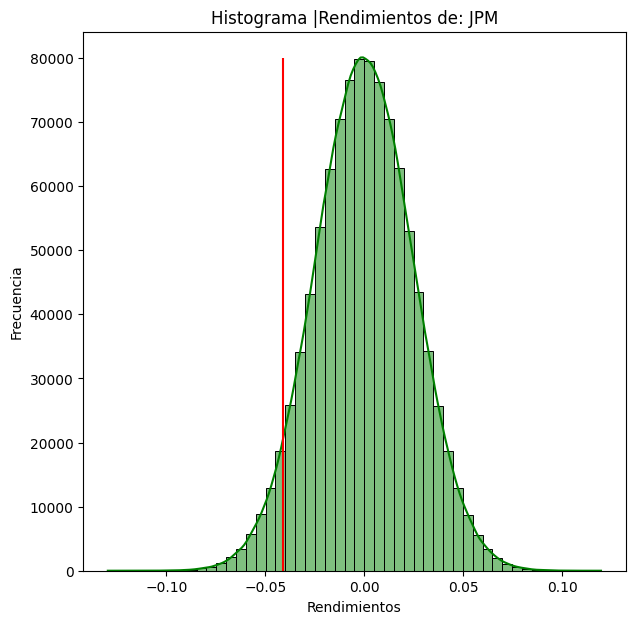

In [32]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_JPM,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma |Rendimientos de: JPM")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

In [33]:
VaR_inversion(VaR_95_montecarlo_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -40833.79290793701


### cVaR

In [34]:
df_cvar = df_simulaciones[df_simulaciones['Rendimientos'] < VaR_95_montecarlo_JPM].reset_index(drop=True)
cvar_95_montecarlo_JPM = np.mean(df_cvar['Rendimientos'])
cvar_95_montecarlo_JPM

-0.05128122349453175

In [35]:
VaR_inversion(cvar_95_montecarlo_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -51281.22349453175


# VaR y cVaR UBS

In [36]:
inversion = 1000000
df_simulaciones = pd.DataFrame()
df_simulaciones["Sim_Z"] = np.random.standard_normal(size=1000000)
s0 = df_percios.iloc[-1,4]
df_simulaciones['Sim_S1'] = df_simulaciones['Sim_Z'].map(lambda x : s0*np.exp((media_UBS-(desviacion_UBS**2)/2)+desviacion_UBS*x))
df_simulaciones

,Sim_Z,Sim_S1
0,0.226345,19.649617
1,1.635617,20.432029
2,2.077779,20.683875
3,0.283811,19.680928
4,1.024818,20.089166
...,...,...
999995,1.996588,20.637399
999996,0.435997,19.764088
999997,0.699215,19.908751
999998,1.159282,20.164148


In [37]:
df_simulaciones['Rendimientos'] = df_simulaciones['Sim_S1'].map(lambda x : np.log(x/s0))
df_simulaciones


,Sim_Z,Sim_S1,Rendimientos
0,0.226345,19.649617,0.005594
1,1.635617,20.432029,0.044640
2,2.077779,20.683875,0.056891
3,0.283811,19.680928,0.007186
4,1.024818,20.089166,0.027717
...,...,...,...
999995,1.996588,20.637399,0.054641
999996,0.435997,19.764088,0.011403
999997,0.699215,19.908751,0.018696
999998,1.159282,20.164148,0.031442


In [38]:
VaR_95_montecarlo_UBS = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_UBS

-0.04624465520782369

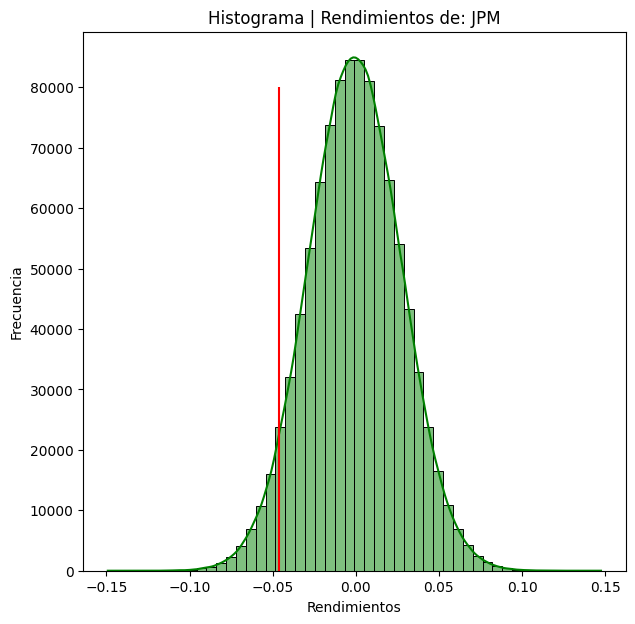

In [39]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_UBS,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma | Rendimientos de: JPM")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

In [40]:
VaR_inversion(VaR_95_montecarlo_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -46244.65520782369


### cVaR

In [41]:
df_cvar = df_simulaciones[df_simulaciones['Rendimientos'] < VaR_95_montecarlo_UBS].reset_index(drop=True)
cvar_95_montecarlo_UBS = np.mean(df_cvar['Rendimientos'])
cvar_95_montecarlo_UBS

-0.05788210645872698

In [42]:
VaR_inversion(cvar_95_montecarlo_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -57882.10645872698


# VaR y cVaR del portafolio


In [43]:
df_percios.dropna(inplace=True)
df_percios.reset_index(drop=True,inplace=True)

In [1]:
df_simulaciones = pd.DataFrame()

#Rendimientos logaritmivos de los activos (columnas)
activos = np.array([df_percios["Log_rend_AAPL"],
                    df_percios["Log_rend_GOOG"],
                    df_percios["Log_rend_JPM"],
                    df_percios["Log_rend_UBS"]])

inversion = 1000000
#Matriz de varianzas y covarianzas entre los rendimientos de los activos
mat_cov = np.cov(activos, rowvar=False)
#Matriz de cholezky, o raiz de la matriz de covarianzas
#La matriz de covarianzas debe ser definida positiva
L = np.linalg.cholesky(mat_cov)
#Rendimientos promedio
mu_vec = np.array([media_AAPL, media_GOOG, media_JPM, media_UBS])
#Matriz de varianzas para generar la normal multivareada
mat_var = np.array([desviacion_AAPL**2, desviacion_GOOG**2, desviacion_JPM**2, desviacion_UBS**2])
#Normal multivareada
norm_mul = np.random.multivariate_normal(mu_vec, mat_cov, 1000000)
#Vector de precios de s0
s0 = np.array([df_portafolio.iloc[-1, 1], df_portafolio.iloc[-1, 2], df_portafolio.iloc[-1, 3], df_portafolio.iloc[-1, 4]])

# Crear un DataFrame vacío para las simulaciones
df_simulaciones = pd.DataFrame()

# Cálculo ajustado para df_simulaciones['Sim_S1']
exp_arg = (mu_vec - (mat_var / 2)) + np.matmul(norm_mul, L.T)
df_simulaciones['Sim_S1'] = np.sum(s0 * np.exp(exp_arg), axis=1)

df_simulaciones


NameError: name 'pd' is not defined

In [44]:
activos = np.array([df_percios["Log_rend_AAPL"],
                    df_percios["Log_rend_GOOG"],
                    df_percios["Log_rend_JPM"],
                    df_percios["Log_rend_UBS"]])

In [46]:
labs = ["AAPL","GOOG","JPM","UBS"]
sns.heatmap(mat_cov,annot=True,fmt="g",xticklabels=labs,yticklabels=labs)
plt.show()

KeyboardInterrupt: 

In [ ]:
df_simulaciones['Rendimientos'] = np.log(df_simulaciones["Sim_S1"]/df_simulaciones["Sim_S1"].shift(1))

In [ ]:
df_simulaciones['Rendimientos'] 

0              NaN
1         0.000474
2        -0.000013
3        -0.001062
4         0.000937
            ...   
999995   -0.000174
999996    0.000096
999997   -0.000235
999998   -0.000027
999999    0.000985
Name: Rendimientos, Length: 1000000, dtype: float64

In [ ]:
df_simulaciones.dropna(inplace=True)
df_simulaciones.reset_index(drop=True,inplace=True)

In [ ]:
VaR_95_montecarlo_portafolio = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_portafolio

-0.0010096798663697243

In [ ]:
VaR_inversion(VaR_95_montecarlo_portafolio,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -1009.6798663697243


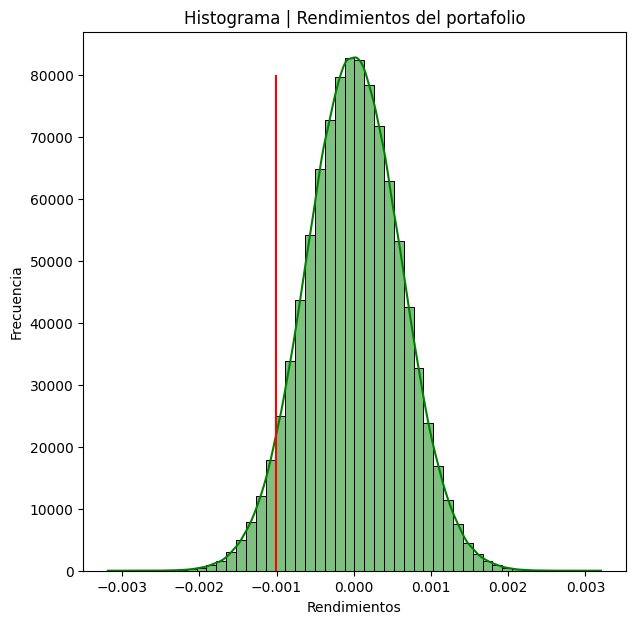

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_portafolio,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma | Rendimientos del portafolio")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
df_cvar = df_simulaciones[df_simulaciones['Rendimientos'] < VaR_95_montecarlo_portafolio].reset_index(drop=True)
cvar_95_montecarlo_portafolio = np.mean(df_cvar['Rendimientos'])
cvar_95_montecarlo_portafolio

-0.0012662806274057335

In [ ]:
VaR_inversion(cvar_95_montecarlo_portafolio,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -1266.2806274057336


# 2.- VaR y cVaR historico

### AAPL

In [ ]:
VaR_historico_AAPL = np.percentile(df_percios["Log_rend_AAPL"],5)
VaR_historico_AAPL

-0.030512848328098707

In [ ]:
VaR_inversion(VaR_historico_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -30512.848328098706


In [ ]:
df_cvar= df_percios[df_percios["Log_rend_AAPL"]<VaR_historico_AAPL].reset_index(drop=True)
cvar_95_historico_AAPL = np.mean(df_cvar['Log_rend_AAPL'])
cvar_95_historico_AAPL

-0.04794533212804089

In [ ]:

VaR_inversion(cvar_95_historico_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -47945.33212804089


### GOOG

In [ ]:
VaR_historico_GOOG = np.percentile(df_percios["Log_rend_GOOG"],5)
VaR_historico_GOOG

-0.028064898220034436

In [ ]:
VaR_inversion(VaR_historico_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -28064.898220034436


In [ ]:
df_cvar= df_percios[df_percios["Log_rend_GOOG"]<VaR_historico_GOOG].reset_index(drop=True)
cvar_95_historico_GOOG = np.mean(df_cvar['Log_rend_GOOG'])
cvar_95_historico_GOOG

-0.04426427322015747

In [ ]:

VaR_inversion(cvar_95_historico_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -44264.27322015747


### JPM

In [ ]:
VaR_historico_JPM = np.percentile(df_percios["Log_rend_JPM"],5)
VaR_historico_JPM

-0.034288779425365234

In [ ]:
VaR_inversion(VaR_historico_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -34288.77942536523


In [ ]:
df_cvar= df_percios[df_percios["Log_rend_JPM"]<VaR_historico_JPM].reset_index(drop=True)
cvar_95_historico_JPM = np.mean(df_cvar['Log_rend_JPM'])
cvar_95_historico_JPM

-0.05735451347181393

In [ ]:
VaR_inversion(cvar_95_historico_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -57354.51347181393


### UBS

In [ ]:
VaR_historico_UBS = np.percentile(df_percios["Log_rend_UBS"],5)
VaR_historico_UBS

-0.0381663558408189

In [ ]:
VaR_inversion(VaR_historico_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -38166.3558408189


In [ ]:
df_cvar= df_percios[df_percios["Log_rend_UBS"]<VaR_historico_UBS].reset_index(drop=True)
cvar_95_historico_UBS = np.mean(df_cvar['Log_rend_UBS'])
cvar_95_historico_UBS

-0.06804634441205665

In [ ]:
VaR_inversion(cvar_95_historico_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -68046.34441205664


### Portafolio

In [ ]:
VaR_historico = np.percentile(df_portafolio["Log_rend_portafolio"],5)
VaR_historico

-0.026696902493629774

In [ ]:
VaR_inversion(VaR_historico,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -26696.902493629776


In [ ]:
df_cvar= df_portafolio[df_portafolio["Log_rend_portafolio"]<VaR_historico].reset_index(drop=True)
cvar_95_historico = np.mean(df_cvar['Log_rend_portafolio'])
cvar_95_historico

-0.042420849717294616

In [ ]:
VaR_inversion(cvar_95_historico,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -42420.849717294615


### 3.- VaR y cVaR Parametrico

In [ ]:
from scipy.stats import norm
import statistics

In [ ]:
Var_parametrico_AAPL = desviacion_AAPL * norm.ppf(0.05) - media_AAPL
Var_parametrico_AAPL

-0.034408024490305236

In [ ]:
VaR_inversion(Var_parametrico_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -34408.02449030524


In [ ]:
z=norm.ppf(0.05)
cvar_95_parametrico_AAPL = media_AAPL - desviacion_AAPL*(norm.pdf(z)/0.05)
cvar_95_parametrico_AAPL

-0.04093442176977752

In [ ]:
VaR_inversion(cvar_95_parametrico_AAPL,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -40934.42176977752


In [ ]:
Var_parametrico_GOOG = desviacion_GOOG * norm.ppf(0.05) - media_GOOG
Var_parametrico_GOOG

-0.03133127067595613

In [ ]:
VaR_inversion(Var_parametrico_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -31331.270675956133


In [ ]:
z=norm.ppf(0.05)
cvar_95_parametrico_GOOG = media_GOOG - desviacion_GOOG*(norm.pdf(z)/0.05)
cvar_95_parametrico_GOOG

-0.03807041755648547

In [ ]:
VaR_inversion(cvar_95_parametrico_GOOG,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -38070.417556485474


In [ ]:
Var_parametrico_JPM = desviacion_JPM * norm.ppf(0.05) - media_JPM
Var_parametrico_JPM


-0.0407589927522476

In [ ]:
VaR_inversion(Var_parametrico_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -40758.9927522476


In [ ]:
z=norm.ppf(0.05)
cvar_95_parametrico_JPM = media_JPM - desviacion_JPM*(norm.pdf(z)/0.05)
cvar_95_parametrico_JPM

-0.05052233552260059

In [ ]:
VaR_inversion(cvar_95_parametrico_JPM,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -50522.33552260059


In [ ]:
Var_parametrico_UBS = desviacion_UBS * norm.ppf(0.05) - media_UBS
Var_parametrico_UBS

-0.04501368103922362

In [ ]:
VaR_inversion(Var_parametrico_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -45013.681039223615


In [ ]:
z=norm.ppf(0.05)
cvar_95_parametrico_UBS = media_UBS - desviacion_UBS*(norm.pdf(z)/0.05)
cvar_95_parametrico_UBS

-0.057063096065770556

In [ ]:
VaR_inversion(cvar_95_parametrico_UBS,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -57063.09606577056


### Portafolio

In [ ]:
Var_parametrico_portafoli =  desviacion_portafolio * norm.ppf(0.05) - media_portafolio
Var_parametrico_portafoli

-0.029622331478435862

In [ ]:
VaR_inversion(Var_parametrico_portafoli,inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -29622.331478435863


In [ ]:
z=norm.ppf(0.05)
cvar_95_parametrico_portafolio = media_portafolio - desviacion_portafolio*(norm.pdf(z)/0.05)
cvar_95_parametrico_portafolio

-0.0359753479154388

In [ ]:
VaR_inversion(cvar_95_parametrico_portafolio, inversion)

La maxima perdida posible invirtiendo 1,000,000 es: -35975.3479154388
